In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hubmap-kidney-segmentation/train.csv
/kaggle/input/hubmap-kidney-segmentation/sample_submission.csv
/kaggle/input/hubmap-kidney-segmentation/HuBMAP-20-dataset_information.csv
/kaggle/input/hubmap-kidney-segmentation/train/cb2d976f4-anatomical-structure.json
/kaggle/input/hubmap-kidney-segmentation/train/095bf7a1f.tiff
/kaggle/input/hubmap-kidney-segmentation/train/1e2425f28.tiff
/kaggle/input/hubmap-kidney-segmentation/train/aaa6a05cc-anatomical-structure.json
/kaggle/input/hubmap-kidney-segmentation/train/54f2eec69.tiff
/kaggle/input/hubmap-kidney-segmentation/train/cb2d976f4.json
/kaggle/input/hubmap-kidney-segmentation/train/095bf7a1f-anatomical-structure.json
/kaggle/input/hubmap-kidney-segmentation/train/cb2d976f4.tiff
/kaggle/input/hubmap-kidney-segmentation/train/e79de561c.json
/kaggle/input/hubmap-kidney-segmentation/train/2f6ecfcdf-anatomical-structure.json
/kaggle/input/hubmap-kidney-segmentation/train/1e2425f28-anatomical-structure.json
/kaggle/input/hubmap-kid

### Importing Required Libraries

In [2]:
!pip install basic-image-eda

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile as tiff 
import seaborn as sns
from basic_image_eda import BasicImageEDA

### Loading Image

The Data is in **tiff** format.
> Tag Image File Format, abbreviated TIFF or TIF, is a computer file format for storing raster graphics images, popular among graphic artists, the publishing industry and photographers. TIFF is widely supported by scanning, faxing, word processing, optical character recognition, image manipulation, desktop publishing, and page-layout applications.

In [7]:
im = tiff.imread("../input/hubmap-kidney-segmentation/train/0486052bb.tiff")
plt.figure(figsize=(16, 16))
plt.show()
#May take time as the data is very large

#### Performing EDA using multiprocessing EDA tool
> Requires Lot of resources

In [ ]:
data_dir = "/kaggle/input/hubmap-kidney-segmentation/train/"  
extensions = ['tiff']
threads = 1
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0
BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

In [9]:
df_info = pd.read_csv("/kaggle/input/hubmap-kidney-segmentation/HuBMAP-20-dataset_information.csv")
df_info.shape

(13, 16)

In [10]:
df_info.head()

,image_file,width_pixels,height_pixels,anatomical_structures_segmention_file,glomerulus_segmentation_file,patient_number,race,ethnicity,sex,age,weight_kilograms,height_centimeters,bmi_kg/m^2,laterality,percent_cortex,percent_medulla
0,afa5e8098.tiff,43780,36800,afa5e8098-anatomical-structure.json,afa5e8098.json,67347,White,Not Hispanic or Latino,Female,58,59.0,160.0,23.0,Right,55,45
1,54f2eec69.tiff,22240,30440,54f2eec69-anatomical-structure.json,54f2eec69.json,67548,Black or African American,Not Hispanic or Latino,Male,58,79.9,190.5,22.0,Right,75,25
2,1e2425f28.tiff,32220,26780,1e2425f28-anatomical-structure.json,1e2425f28.json,63921,White,Not Hispanic or Latino,Male,48,131.5,193.0,35.3,Right,65,35
3,e79de561c.tiff,27020,16180,e79de561c-anatomical-structure.json,e79de561c.json,67026,Black or African American,Not Hispanic or Latino,Male,53,73.0,166.0,26.5,Left,55,45
4,c68fe75ea.tiff,19780,26840,c68fe75ea-anatomical-structure.json,c68fe75ea.json,67112,White,Not Hispanic or Latino,Male,56,91.2,167.6,32.5,Left,80,20


In [11]:
df_info.describe()

,width_pixels,height_pixels,patient_number,age,weight_kilograms,height_centimeters,bmi_kg/m^2,percent_cortex,percent_medulla
count,13.000000,13.000000,13.000000,13.000000,12.000000,12.000000,12.000000,13.000000,13.000000
mean,32414.076923,28460.384615,67137.846154,56.307692,82.383333,171.575000,27.858333,66.923077,33.076923
std,10604.540643,7999.723720,1213.636879,11.742974,20.636104,13.307901,5.376457,10.904598,10.904598
min,13013.000000,14844.000000,63921.000000,31.000000,59.000000,157.400000,22.000000,55.000000,20.000000
25%,25794.000000,25784.000000,67026.000000,53.000000,71.600000,160.000000,23.000000,55.000000,25.000000
50%,32220.000000,30440.000000,67347.000000,58.000000,76.450000,166.800000,26.500000,65.000000,35.000000
75%,40429.000000,34940.000000,67548.000000,58.000000,91.650000,182.850000,32.525000,75.000000,45.000000
max,49548.000000,38160.000000,68555.000000,76.000000,131.500000,193.000000,37.500000,80.000000,45.000000


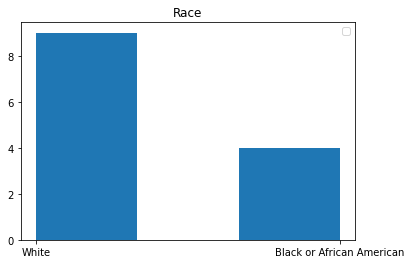

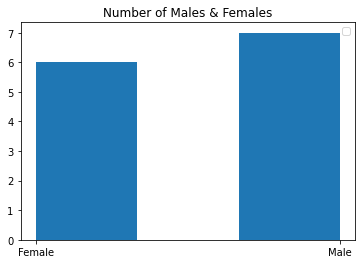

In [12]:
plt.hist(df_info['race'],histtype='bar',bins=3)
plt.title('Race')
plt.legend()
plt.show()
plt.hist(df_info['sex'],histtype='bar',bins=3)
plt.title('Number of Males & Females')
plt.legend()
plt.show()

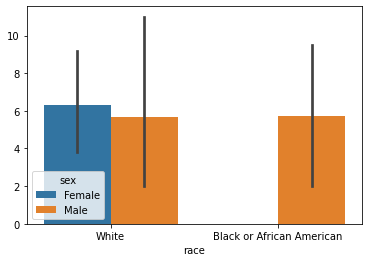

In [13]:
sns.barplot(x="race", y=range(13), hue="sex", data=df_info, )

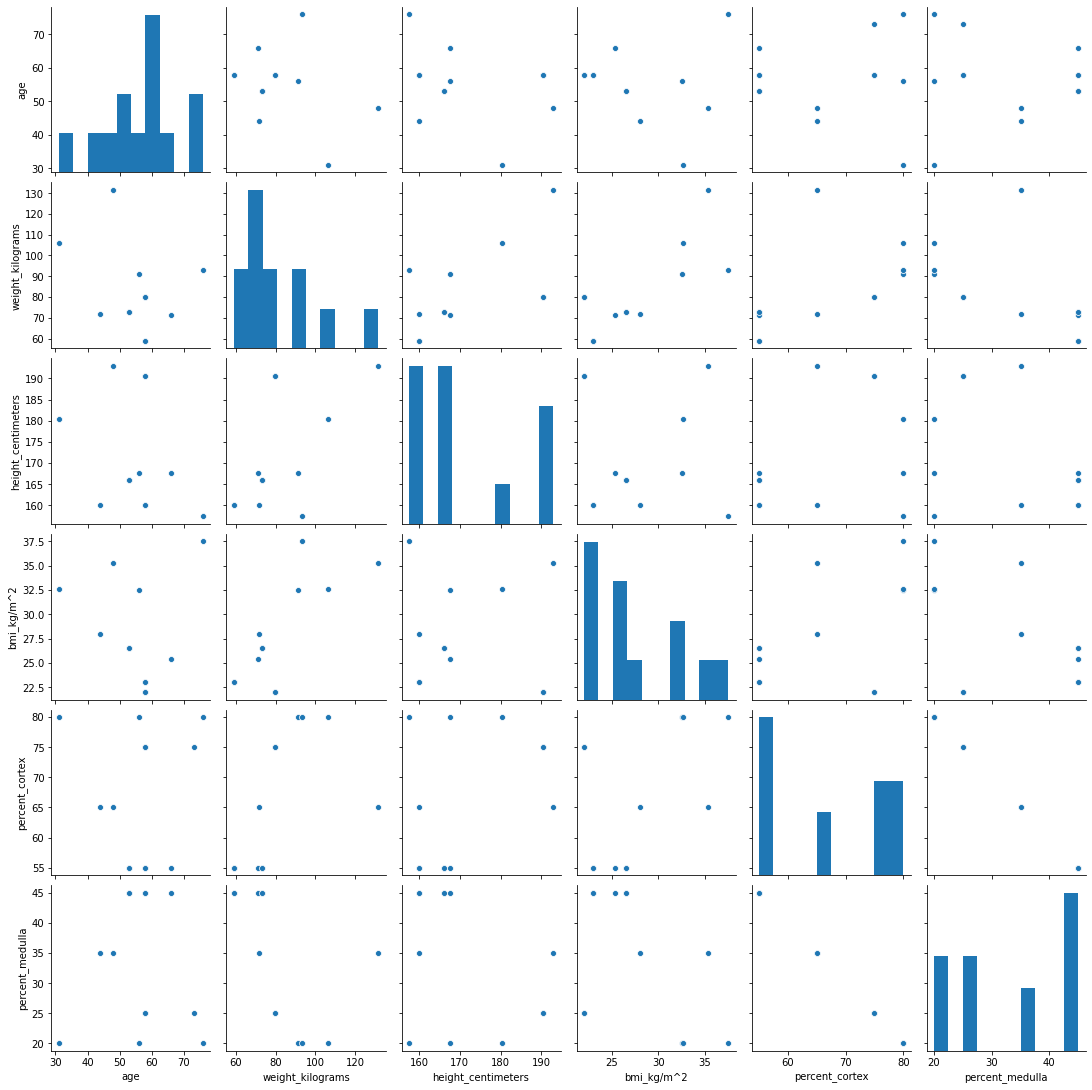

In [14]:
sns.pairplot(df_info[['race','ethnicity', 'sex', 'age', 'weight_kilograms',
       'height_centimeters', 'bmi_kg/m^2', 'laterality', 'percent_cortex',
       'percent_medulla']])

*Since the csv dataset is very small,
No order was observed from Pair plot.*

## To be continued...